In [1]:
import cv2
import numpy as np
import librosa
import matplotlib.pyplot as plt
import librosa.display
from IPython.display import Audio, display

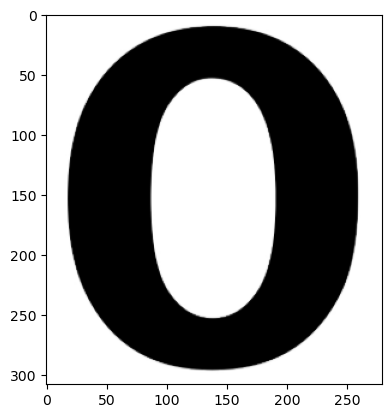

In [40]:
img= cv2.imread("Data/image.png", cv2.IMREAD_GRAYSCALE)
plt.imshow(img, cmap='gray')
plt.show()

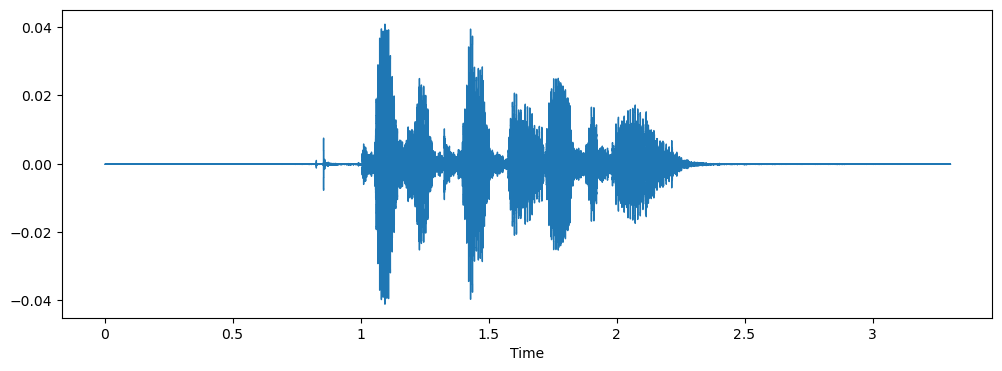

In [8]:
y, sr= librosa.load(r"Data\test.wav")

display(Audio(data=y, rate=sr))

plt.figure(figsize=(12, 4))
librosa.display.waveshow(y, sr=sr)
plt.show()

In [41]:
print(img.shape)
print(img)

print(y.shape)
print(y)

(308, 280)
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
(72838,)
[ 5.3765390e-08 -2.1233145e-08 -6.0478342e-09 ...  4.8083174e-14
 -9.6233243e-15  2.8714739e-14]


In [ ]:
print((img.shape[0]*img.shape[1]))
print(y.shape[0])

99484
3.3033106575963718
22050


In [35]:
def test(c):
    display(Audio(data=c, rate=sr))

    plt.figure(figsize=(12, 4))
    librosa.display.waveshow(c, sr=sr)
    plt.show()

(86240,)


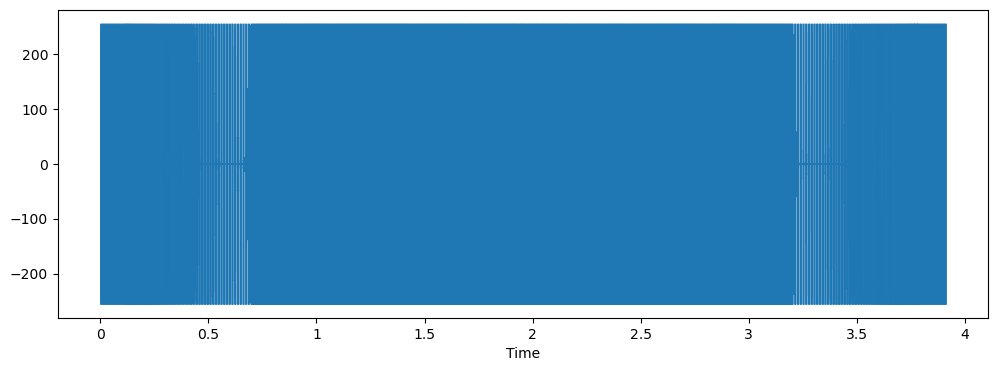

In [42]:
c= []

for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        c.append(float(img[i][j]))


c=np.array(c)
print(c.shape)

test(c)

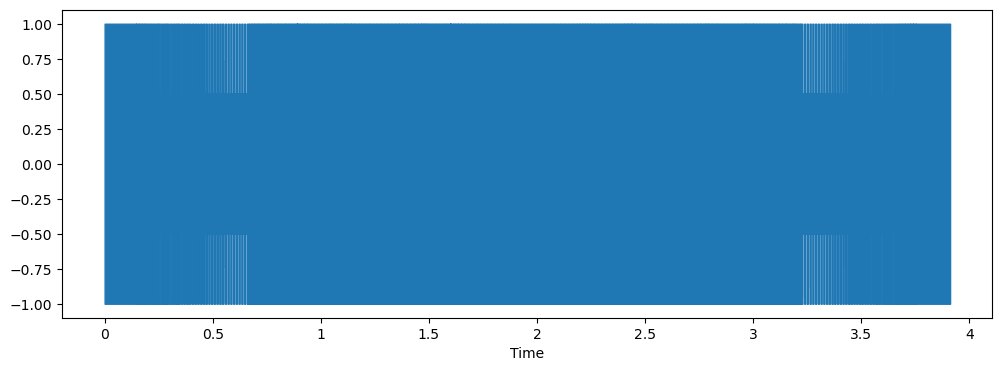

In [44]:
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

d= []
for i in range(len(c)):
    d.append(sigmoid(c[i]))

d= np.array(d)
test(d)

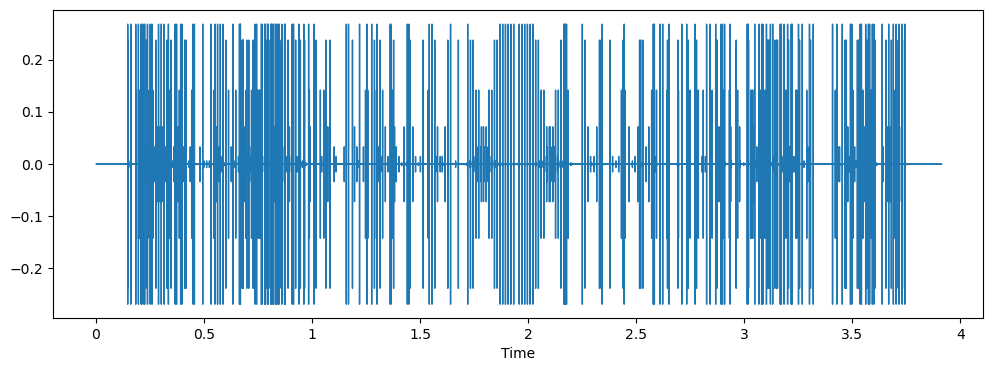

In [45]:
def f1(x):
    return x / (1 + np.exp(x))

e= []
for i in range(len(c)):
    e.append(f1(c[i]))

e= np.array(e)
test(e)

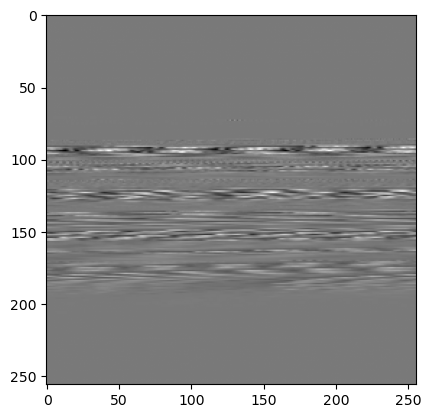

In [74]:
y, sr= librosa.load(r"Data\test.wav")
scale= 255/(np.max(y))

y= y * scale
y= y.astype(np.int32)

cvt= np.zeros((256, 256)).astype(np.int32)
for i in range(256):
    for j in range(256):
        cvt[i][j]= int(y[i*256 + j])

plt.imshow(cvt, cmap='gray')
plt.show()

C:\Users\AYUSH\AppData\Local\Temp\ipykernel_24336\1675363217.py:6: ComplexWarning: Casting complex values to real discards the imaginary part
  z= z.astype(np.int32)


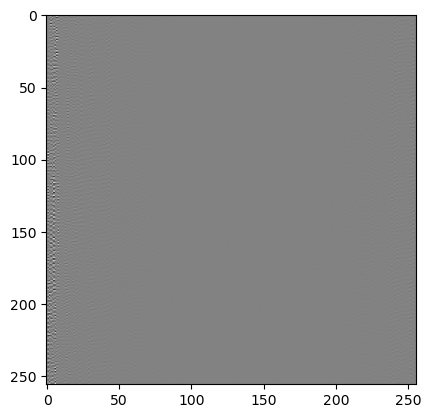

In [71]:
y, sr= librosa.load(r"Data\test.wav")

z= np.fft.fft(y)
scale= 255/(np.max(z))
z= z * scale
z= z.astype(np.int32)

cvt= np.zeros((256, 256)).astype(np.int32)
for i in range(256):
    for j in range(256):
        cvt[i][j]= int(z[j*256 + i])

plt.imshow(cvt, cmap='gray')
plt.show()